In [7]:
import pandas as pd

# Load the dataset from the Excel file
df = pd.read_csv("C:/Users/user/Downloads/forecast.csv")
# Display the first few rows of the dataset
df


,year,renewable energy share
0,1965,6.453481
1,1966,6.531924
2,1967,6.433515
3,1968,6.395765
4,1969,6.345422
5,1970,6.260022
6,1971,6.287538
7,1972,6.251102
8,1973,5.997508
9,1974,6.539249


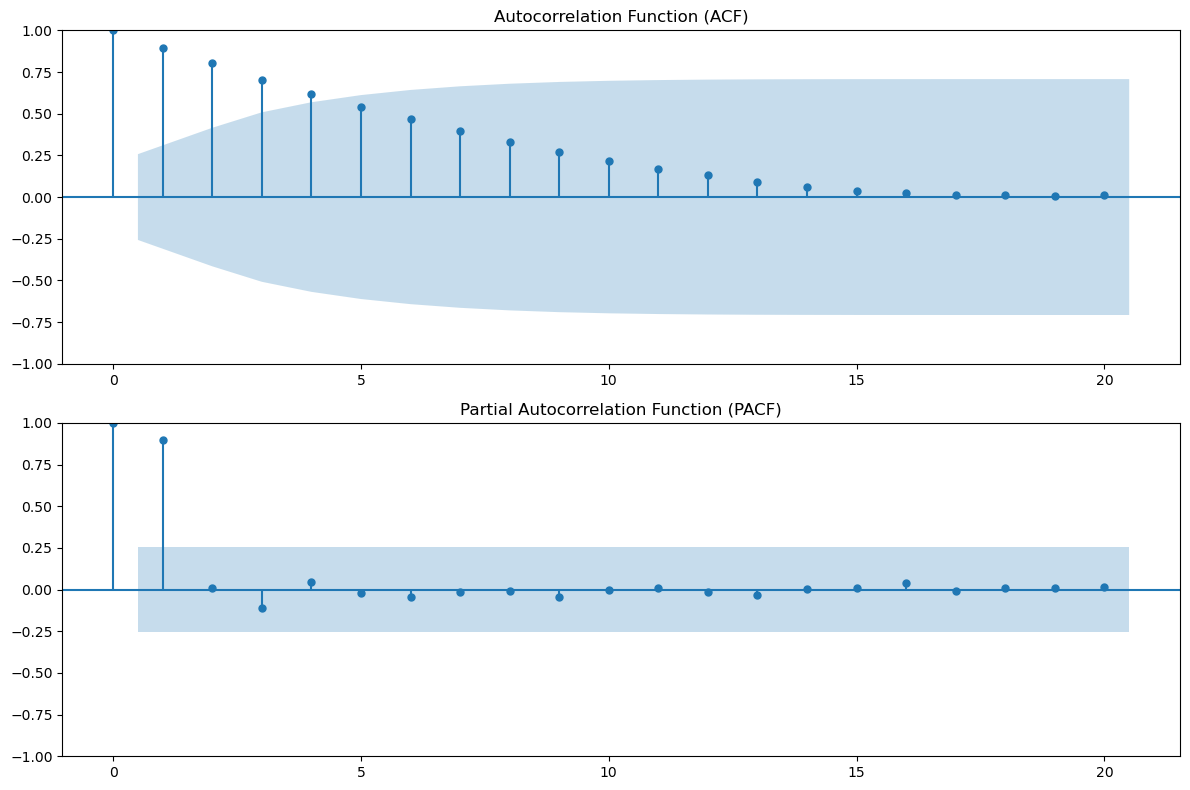

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Extract the time series data
time_series = df['renewable energy share']

# Adjust the number of lags to 20
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(time_series, lags=20, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(time_series, lags=20, ax=axes[1], method='ywm')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(time_series)

# Extract and display the results
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations'])
for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

adf_output

Test Statistic           5.607190
p-value                  1.000000
# Lags Used              0.000000
# Observations          57.000000
Critical Value (1%)     -3.550670
Critical Value (5%)     -2.913766
Critical Value (10%)    -2.594624
dtype: float64

In [11]:
# Difference the series
diff_series = time_series.diff().dropna()

# Perform the ADF test on the differenced series
adf_result_diff = adfuller(diff_series)

# Extract and display the results
adf_output_diff = pd.Series(adf_result_diff[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations'])
for key, value in adf_result_diff[4].items():
    adf_output_diff['Critical Value (%s)' % key] = value

adf_output_diff

Test Statistic          -0.433391
p-value                  0.904373
# Lags Used              3.000000
# Observations          53.000000
Critical Value (1%)     -3.560242
Critical Value (5%)     -2.917850
Critical Value (10%)    -2.596796
dtype: float64

In [12]:
# Second differencing the series
diff_series_2 = diff_series.diff().dropna()

# Perform the ADF test on the twice differenced series
adf_result_diff_2 = adfuller(diff_series_2)

# Extract and display the results
adf_output_diff_2 = pd.Series(adf_result_diff_2[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations'])
for key, value in adf_result_diff_2[4].items():
    adf_output_diff_2['Critical Value (%s)' % key] = value

adf_output_diff_2

Test Statistic         -9.417250e+00
p-value                 5.625949e-16
# Lags Used             1.000000e+00
# Observations          5.400000e+01
Critical Value (1%)    -3.557709e+00
Critical Value (5%)    -2.916770e+00
Critical Value (10%)   -2.596222e+00
dtype: float64

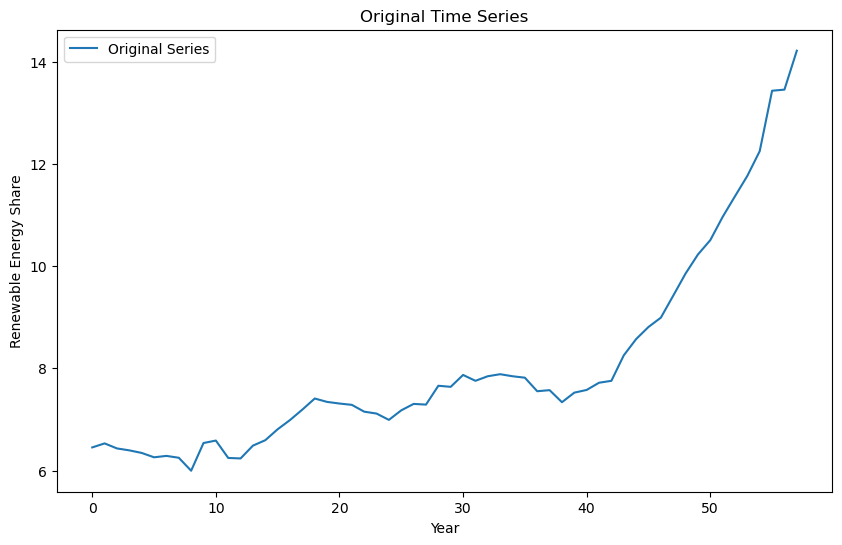

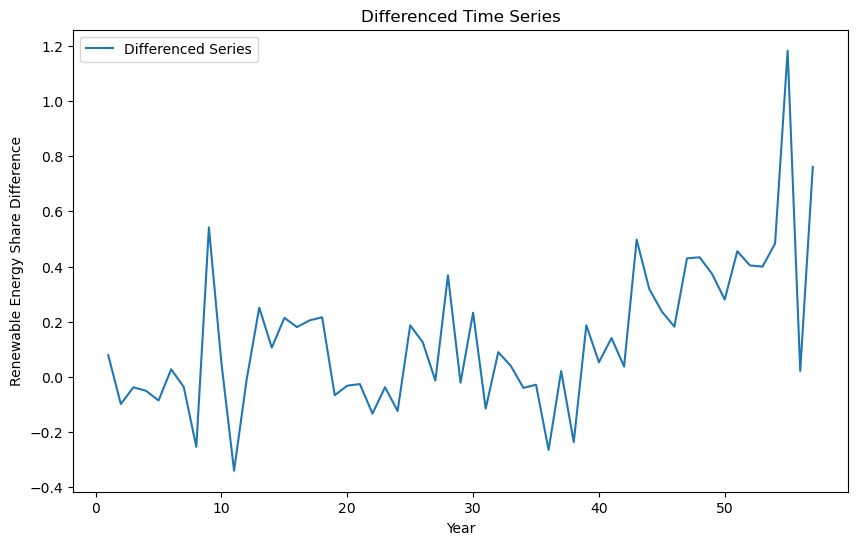

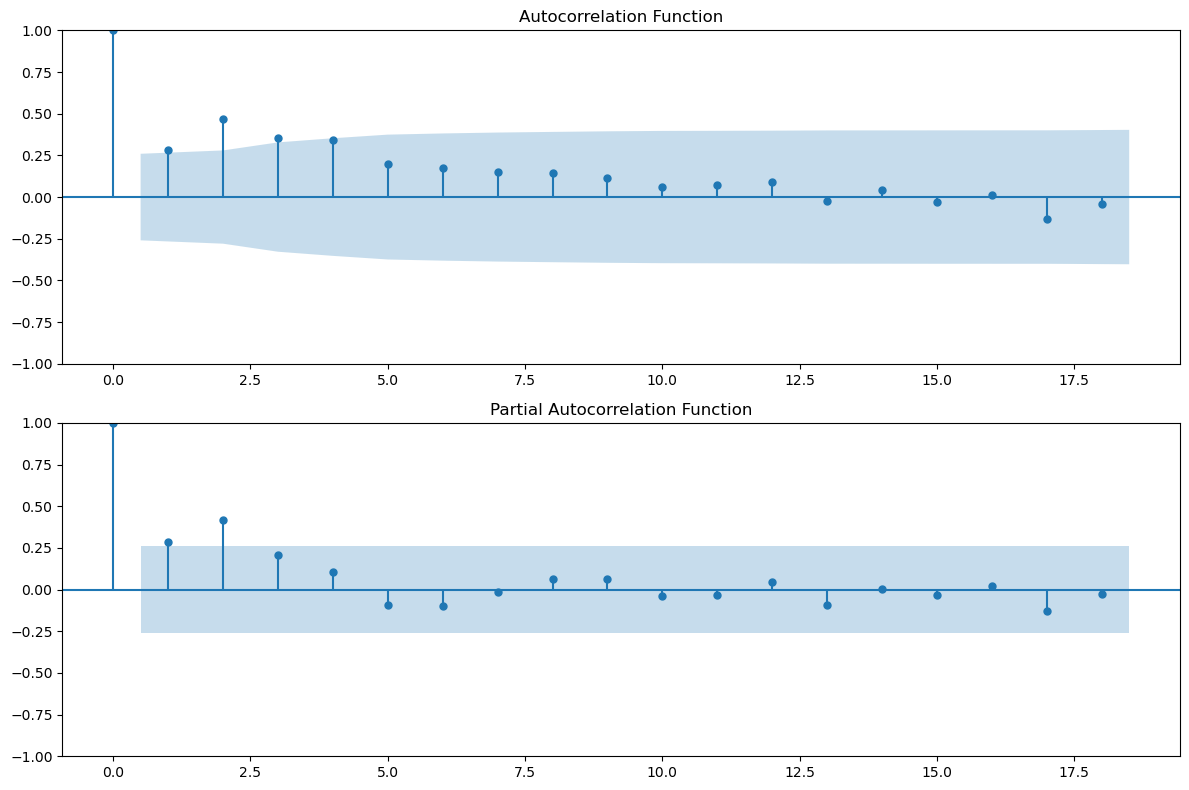

(5.607190382559711, 1.0)

In [22]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Extract the 'renewable energy share' column
data_series = df['renewable energy share']

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data_series, label='Original Series')
plt.title('Original Time Series')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share')
plt.legend()
plt.show()

# Check stationarity with Augmented Dickey-Fuller test
adf_result = adfuller(data_series)
adf_statistic, p_value = adf_result[0], adf_result[1]

# Differencing the data to make it stationary
data_diff = data_series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Series')
plt.title('Differenced Time Series')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share Difference')
plt.legend()
plt.show()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_diff, ax=ax[0])
plot_pacf(data_diff, ax=ax[1])

ax[0].set_title('Autocorrelation Function')
ax[1].set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

(adf_statistic, p_value)



In [13]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Ignore warnings
warnings.filterwarnings("ignore")

# Function to perform grid search for ARIMA parameters
def arima_grid_search(ts, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    best_model = None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(ts, order=(p,d,q))
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, (p,d,q)
                        best_model = model_fit
                except:
                    continue
    return best_cfg, best_score, best_model

# Define the p, d, q parameters to take any value between 0 and 2
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Perform grid search to find the best ARIMA model parameters
best_cfg, best_score, best_model = arima_grid_search(time_series, p_values, d_values, q_values)
best_cfg, best_score

((0, 2, 2), -6.35804988250659)

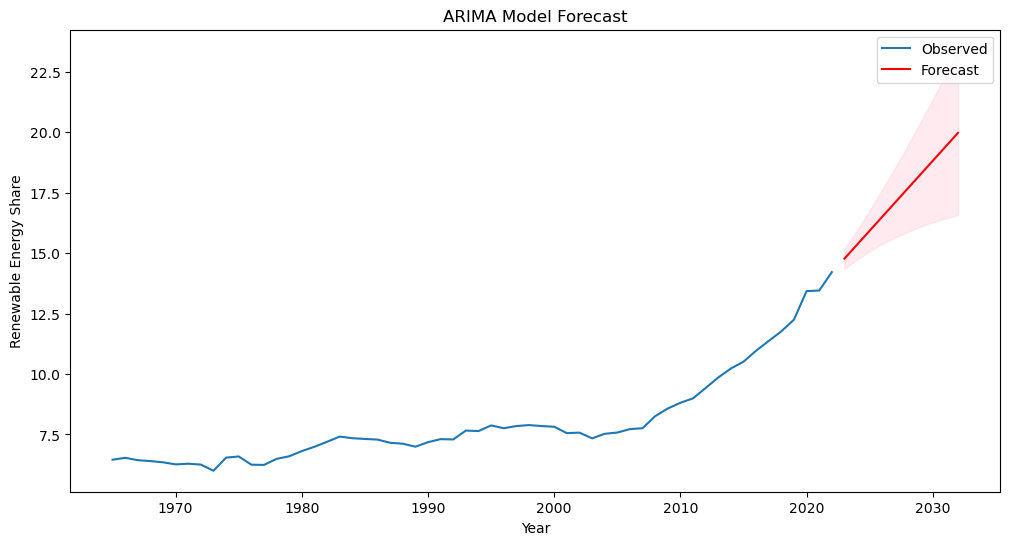

(58    14.772503
 59    15.350841
 60    15.929178
 61    16.507516
 62    17.085854
 63    17.664192
 64    18.242530
 65    18.820867
 66    19.399205
 67    19.977543
 Name: predicted_mean, dtype: float64,
     lower renewable energy share  upper renewable energy share
 58                     14.351488                     15.193518
 59                     14.744656                     15.957026
 60                     15.083260                     16.775097
 61                     15.381032                     17.634000
 62                     15.645371                     18.526337
 63                     15.880653                     19.447731
 64                     16.089766                     20.395293
 65                     16.274793                     21.366941
 66                     16.437334                     22.361076
 67                     16.578674                     23.376412)

In [19]:
# Correct the column name issue
df.columns = df.columns.str.strip()

# Fit the ARIMA model with the best parameters
best_arima_model = ARIMA(time_series, order=best_cfg)
best_arima_fit = best_arima_model.fit()

# Forecast the next 10 years (10 data points)
forecast_steps = 10
forecast_result = best_arima_fit.get_forecast(steps=forecast_steps)

# Extract forecast mean and confidence intervals
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# Generate the years for the forecasted period
forecast_years = range(df['year'].iloc[-1] + 1, df['year'].iloc[-1] + 1 + forecast_steps)

# Plot the forecasts along with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df['year'], time_series, label='Observed')
plt.plot(forecast_years, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_years, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# Display forecast mean and confidence intervals
forecast_mean, forecast_conf_int


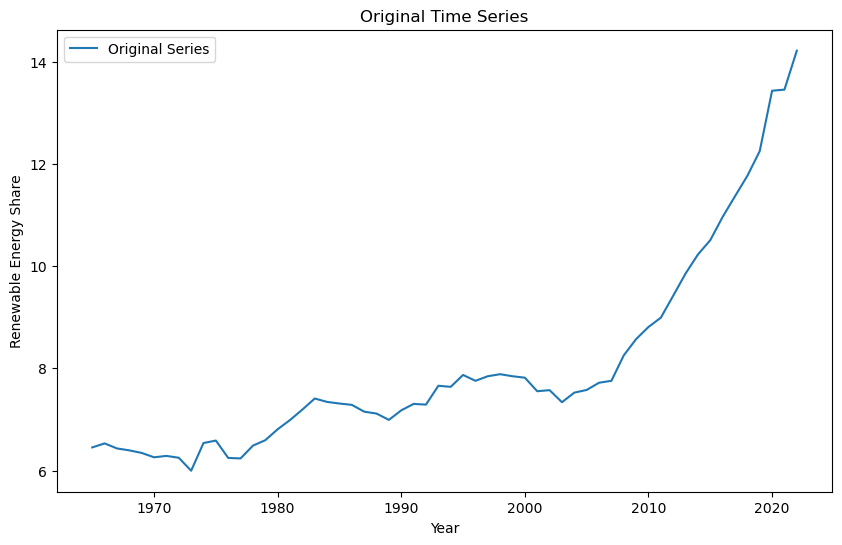

ADF Statistic: 5.607190382559711
p-value: 1.0


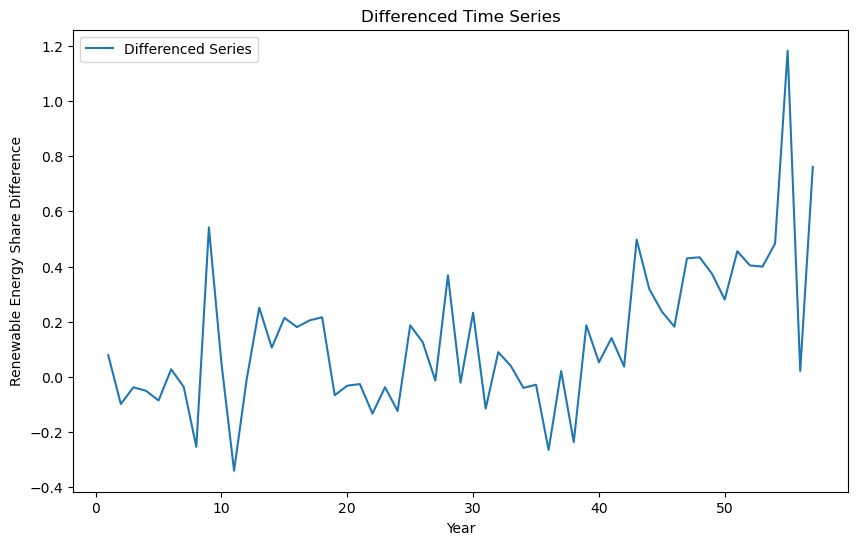

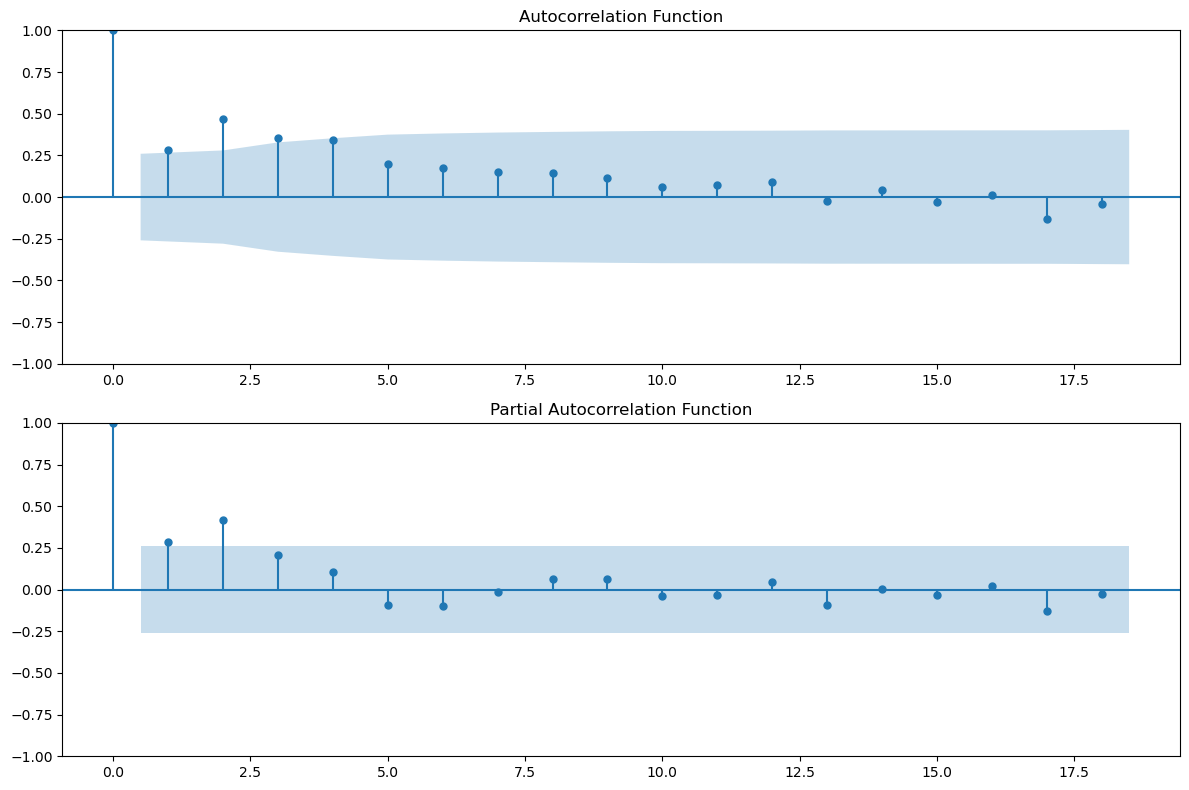

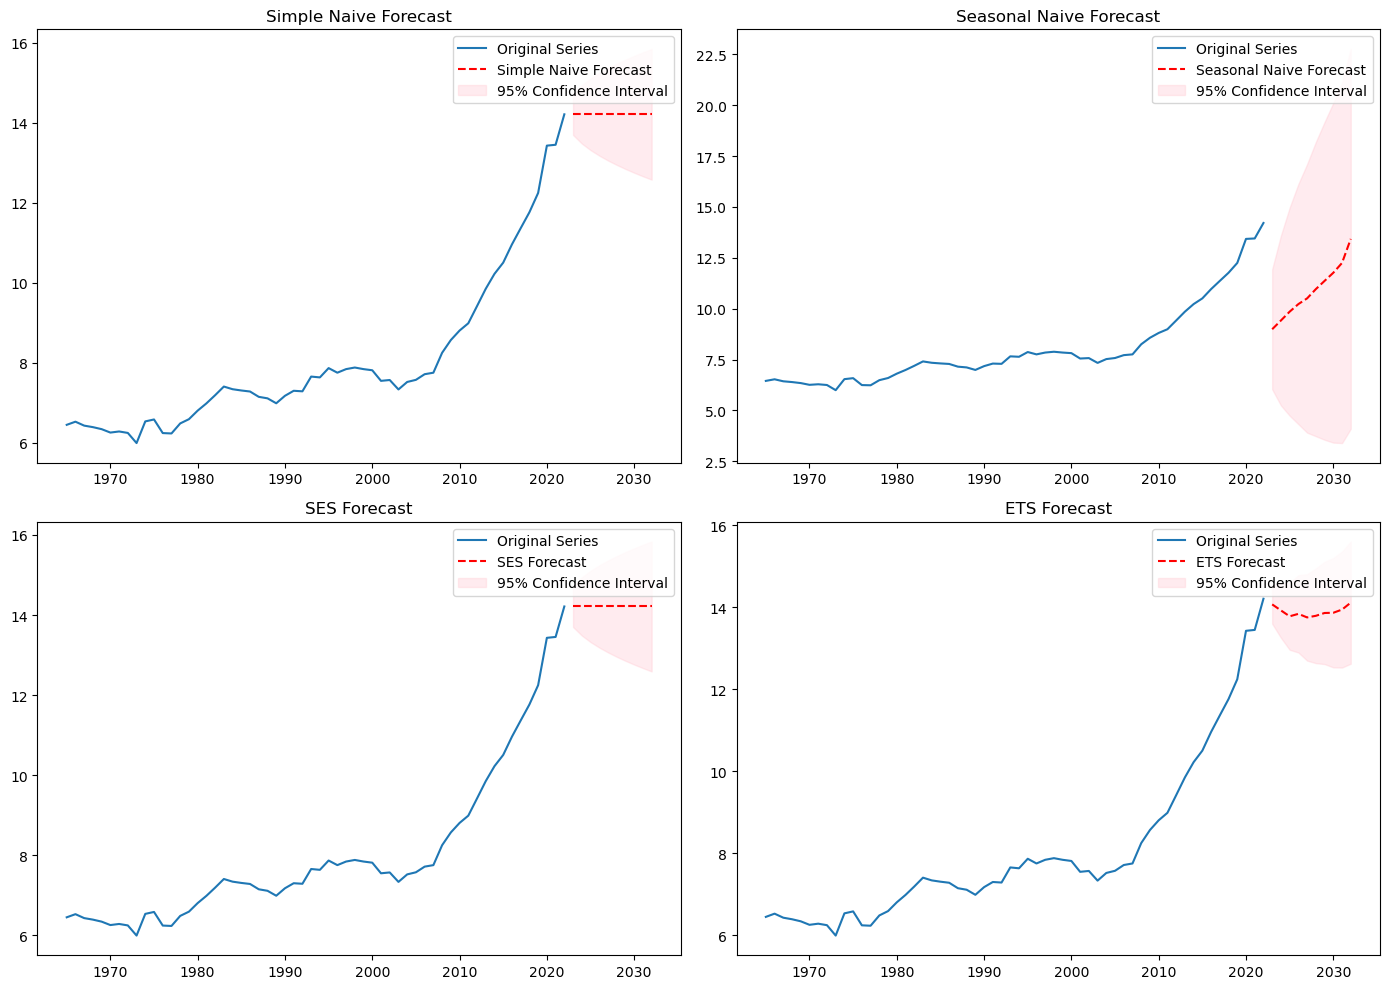

,Year,Simple Naive Forecast,Simple Naive Lower CI,Simple Naive Upper CI,Seasonal Naive Forecast,Seasonal Naive Lower CI,Seasonal Naive Upper CI,SES Forecast,SES Lower CI,SES Upper CI,ETS Forecast,ETS Lower CI,ETS Upper CI
0,2023,14.213598,13.697664,14.729532,8.991375,6.040908,11.941842,14.213598,13.700953,14.726243,14.075161,13.604025,14.546297
1,2024,14.213598,13.483957,14.943239,9.420794,5.248204,13.593384,14.213598,13.488608,14.938588,13.928377,13.262090,14.594664
2,2025,14.213598,13.319974,15.107222,9.854327,4.743969,14.964685,14.213598,13.325670,15.101526,13.784421,12.968390,14.600452
3,2026,14.213598,13.181730,15.245466,10.227056,4.326123,16.127990,14.213598,13.188308,15.238888,13.844243,12.901972,14.786515
4,2027,14.213598,13.059934,15.367262,10.507513,3.910069,17.104957,14.213598,13.067288,15.359907,13.757550,12.704058,14.811041
5,2028,14.213598,12.949823,15.477373,10.962859,3.735721,18.189997,14.213598,12.957879,15.469317,13.796448,12.642405,14.950490
6,2029,14.213598,12.848564,15.578632,11.366829,3.560628,19.173030,14.213598,12.857266,15.569930,13.865400,12.618891,15.111908
7,2030,14.213598,12.754316,15.672880,11.766204,3.421024,20.111384,14.213598,12.763618,15.663578,13.871008,12.538435,15.203581
8,2031,14.213598,12.665795,15.761401,12.248977,3.397577,21.100377,14.213598,12.675662,15.751534,13.948125,12.534717,15.361532
9,2032,14.213598,12.582071,15.845125,13.430855,4.100660,22.761050,14.213598,12.592472,15.834724,14.118281,12.628419,15.608143


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Load the data
# Load the dataset from the Excel file
df = pd.read_csv("C:/Users/user/Downloads/forecast.csv")
# Display the first few rows of the dataset
df
data_series = df['renewable energy share']

# Assume the data starts in 1965 and is annual
start_year = 1965
years = np.arange(start_year, start_year + len(data_series))

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(years, data_series, label='Original Series')
plt.title('Original Time Series')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share')
plt.legend()
plt.show()

# Check stationarity with Augmented Dickey-Fuller test
adf_result = adfuller(data_series)
adf_statistic, p_value = adf_result[0], adf_result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Differencing the data to make it stationary
data_diff = data_series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Series')
plt.title('Differenced Time Series')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share Difference')
plt.legend()
plt.show()

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_diff, ax=ax[0])
plot_pacf(data_diff, ax=ax[1])

ax[0].set_title('Autocorrelation Function')
ax[1].set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# Forecast horizon
h = 10
future_years = np.arange(start_year + len(data_series), start_year + len(data_series) + h)

# Simple Naive Forecast
simple_naive_forecast = np.repeat(data_series.iloc[-1], h)
simple_naive_resid = data_series.diff().dropna()  # Residuals for naive method
def get_naive_confidence_intervals(forecast, resid, alpha=0.05):
    z = 1.96  # For 95% confidence interval
    stderr = np.std(resid)  # Standard error of the residuals
    conf_int = z * stderr * np.sqrt(np.arange(1, len(forecast) + 1))
    lower_bound = forecast - conf_int
    upper_bound = forecast + conf_int
    return lower_bound, upper_bound

simple_naive_lower, simple_naive_upper = get_naive_confidence_intervals(simple_naive_forecast, simple_naive_resid)

# Seasonal Naive Forecast
season_length = 12  # Assuming monthly data with yearly seasonality
seasonal_naive_forecast = np.tile(data_series.iloc[-season_length:], int(np.ceil(h / season_length)))[:h]
seasonal_naive_resid = (data_series - data_series.shift(season_length)).dropna()  # Residuals for seasonal naive method
seasonal_naive_lower, seasonal_naive_upper = get_naive_confidence_intervals(seasonal_naive_forecast, seasonal_naive_resid)

# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(data_series).fit()
ses_forecast = ses_model.forecast(h)
def get_confidence_intervals(forecast_model, forecast, alpha=0.05):
    z = 1.96  # For 95% confidence interval
    stderr = np.std(forecast_model.resid)  # Standard error of the residuals
    conf_int = z * stderr * np.sqrt(np.arange(1, h + 1))
    lower_bound = forecast - conf_int
    upper_bound = forecast + conf_int
    return lower_bound, upper_bound

ses_lower, ses_upper = get_confidence_intervals(ses_model, ses_forecast)

# ETS Model
ets_model = ExponentialSmoothing(data_series, seasonal='add', seasonal_periods=season_length).fit()
ets_forecast = ets_model.forecast(h)
ets_lower, ets_upper = get_confidence_intervals(ets_model, ets_forecast)

# Convert forecast and confidence intervals to numeric types
ses_forecast = np.array(ses_forecast, dtype=np.float64)
ses_lower = np.array(ses_lower, dtype=np.float64)
ses_upper = np.array(ses_upper, dtype=np.float64)

ets_forecast = np.array(ets_forecast, dtype=np.float64)
ets_lower = np.array(ets_lower, dtype=np.float64)
ets_upper = np.array(ets_upper, dtype=np.float64)

# Plotting the forecasts with confidence intervals
plt.figure(figsize=(14, 10))

# Simple Naive
plt.subplot(2, 2, 1)
plt.plot(years, data_series, label='Original Series')
plt.plot(future_years, simple_naive_forecast, color='r', linestyle='--', label='Simple Naive Forecast')
plt.fill_between(future_years, simple_naive_lower, simple_naive_upper, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Simple Naive Forecast')
plt.legend()

# Seasonal Naive
plt.subplot(2, 2, 2)
plt.plot(years, data_series, label='Original Series')
plt.plot(future_years, seasonal_naive_forecast, color='r', linestyle='--', label='Seasonal Naive Forecast')
plt.fill_between(future_years, seasonal_naive_lower, seasonal_naive_upper, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Seasonal Naive Forecast')
plt.legend()

# SES
plt.subplot(2, 2, 3)
plt.plot(years, data_series, label='Original Series')
plt.plot(future_years, ses_forecast, color='r', linestyle='--', label='SES Forecast')
plt.fill_between(future_years, ses_lower, ses_upper, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('SES Forecast')
plt.legend()

# ETS
plt.subplot(2, 2, 4)
plt.plot(years, data_series, label='Original Series')
plt.plot(future_years, ets_forecast, color='r', linestyle='--', label='ETS Forecast')
plt.fill_between(future_years, ets_lower, ets_upper, color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('ETS Forecast')
plt.legend()

plt.tight_layout()
plt.show()

# Display the forecasted values and confidence intervals in a table format
forecast_table = pd.DataFrame({
    'Year': future_years,
    'Simple Naive Forecast': simple_naive_forecast,
    'Simple Naive Lower CI': simple_naive_lower,
    'Simple Naive Upper CI': simple_naive_upper,
    'Seasonal Naive Forecast': seasonal_naive_forecast,
    'Seasonal Naive Lower CI': seasonal_naive_lower,
    'Seasonal Naive Upper CI': seasonal_naive_upper,
    'SES Forecast': ses_forecast,
    'SES Lower CI': ses_lower,
    'SES Upper CI': ses_upper,
    'ETS Forecast': ets_forecast,
    'ETS Lower CI': ets_lower,
    'ETS Upper CI': ets_upper
})

forecast_table.head(10)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Split the data into training and test sets
train_size = int(len(data_series) * 0.8)
train, test = data_series[:train_size], data_series[train_size:]

# Forecast horizon
h = len(test)
future_years = np.arange(start_year + len(train), start_year + len(train) + h)

# Define a function to calculate the accuracy metrics
def calculate_accuracy(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Simple Naive Forecast
simple_naive_forecast = np.repeat(train.iloc[-1], h)
simple_naive_mae, simple_naive_mse, simple_naive_rmse = calculate_accuracy(test, simple_naive_forecast)

# Seasonal Naive Forecast
season_length = 12 # Assuming annual data with yearly seasonality
seasonal_naive_forecast = np.tile(train.iloc[-season_length:], int(np.ceil(h / season_length)))[:h]
seasonal_naive_mae, seasonal_naive_mse, seasonal_naive_rmse = calculate_accuracy(test, seasonal_naive_forecast)

# Simple Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(train).fit()
ses_forecast = ses_model.forecast(h)
ses_mae, ses_mse, ses_rmse = calculate_accuracy(test, ses_forecast)

# ETS Model
ets_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=season_length).fit()
ets_forecast = ets_model.forecast(h)
ets_mae, ets_mse, ets_rmse = calculate_accuracy(test, ets_forecast)
# ARIMA Model
# Determine the best parameters for ARIMA (order) if not predefined
# This could involve grid search or other parameter selection methods
best_cfg = (1, 1, 1)  # Replace with the best found configuration
arima_model = ARIMA(train, order=best_cfg)
arima_fit = arima_model.fit()

# Make predictions on the test set
arima_forecast = arima_fit.predict(start=len(train), end=len(train) + h - 1, dynamic=False)
arima_mae, arima_mse, arima_rmse = calculate_accuracy(test, arima_forecast)

# Summarize the results
results = pd.DataFrame({
    'Model': ['Simple Naive', 'Seasonal Naive', 'SES', 'ETS', 'ARIMA'],
    'MAE': [simple_naive_mae, seasonal_naive_mae, ses_mae, ets_mae, arima_mae],
    'MSE': [simple_naive_mse, seasonal_naive_mse, ses_mse, ets_mse, arima_mse],
    'RMSE': [simple_naive_rmse, seasonal_naive_rmse, ses_rmse, ets_rmse, arima_rmse]
})

# Display the results
print(results)

            Model       MAE        MSE      RMSE
0    Simple Naive  2.560882   9.188965  3.031331
1  Seasonal Naive  3.508594  14.069958  3.750994
2             SES  2.560882   9.188965  3.031331
3             ETS  2.818412  10.337133  3.215141
4           ARIMA  2.309074   7.789564  2.790979
